## Load Stuff

In [1]:
from CellFreeNetwork import CellFreeNetwork
from ClusteringAlgorithms import massive_access_clustering, emil_heuristic_dcc_pilot_assignment
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import json
import os

setting = 'mock'
cases = ['MMSE', 'PMMSE', 'PRZF', 'MRC']
alg_indices = [0,1,1,2]
layout_dir_path = f'../GraphGenerationLayouts/'
layout_dir_files = os.listdir(layout_dir_path)
solutions_path = f'../MatlabSolutions/'
solutions_dir_files = os.listdir(solutions_path)

ix_pilot_allocs_opt = solutions_dir_files.index(f'sol_pilots.mat')
pilot_allocs_opt = loadmat(solutions_path + solutions_dir_files[ix_pilot_allocs_opt])['a'].astype('uint8')

ix_opt_cluster = solutions_dir_files.index(f'sol_clustering.mat')
clusters = loadmat(solutions_path + solutions_dir_files[ix_opt_cluster])['x']
layout_files = [file for file in layout_dir_files if file.split('.')[1] == 'mat' and file.startswith(setting)]
params_file = [file for file in layout_dir_files if file.split('.')[1] == 'json'][0]
params = json.load(open(layout_dir_path + params_file))

num_pilots = params['pilot_len']
num_users = params['num_users']
num_aps = params['num_aps']
num_layouts = len(layout_files)

# dlt_keys = list(layout_data_dict.keys())[0:5]
# dlt_keys.extend(list(layout_data_dict.keys())[12:])
# for key in dlt_keys:
#     del layout_data_dict[key]
# network_opt = CellFreeNetwork(**params)
# network_chen = CellFreeNetwork(**params)
# network_emil = CellFreeNetwork(**params)
# network_opt.set_pilot_alloc(pilot_alloc_emil)
# network_opt.set_clusters(clusters_emil)
# network_chen.set_pilot_alloc(pilot_alloc_emil)
# network_chen.set_clusters(clusters_emil)
# network_emil.set_pilot_alloc(pilot_alloc_emil)
# network_emil.set_clusters(clusters_emil)
#
# network_opt.set_snapshot(**layout_data_dict)
# network_chen.set_snapshot(**layout_data_dict)
# network_emil.set_snapshot(**layout_data_dict)
#
# algorithm = alg_indices[cases.index('MMSE')]

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../GraphGenerationLayouts/'

## Optimal vs Chen vs Emil Clusters - Same User

Text(0.5, 1.0, 'Emil')

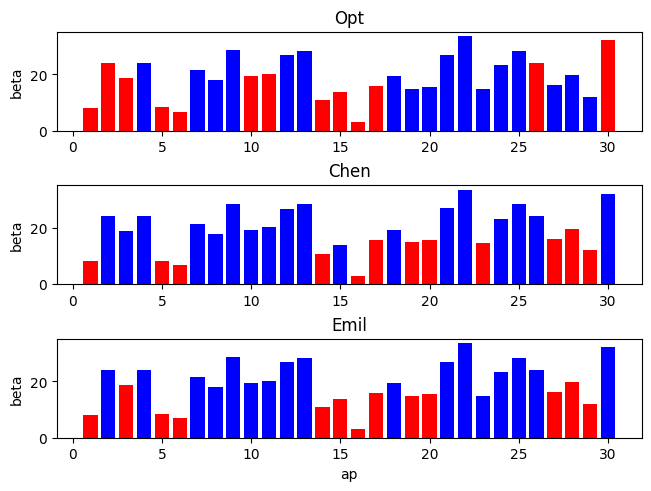

In [2]:
layout = 5
user = 2
algorithm = 0

file = f"{setting}_layout_data_{layout}.mat"
layout_data_dict = loadmat(layout_dir_path + file)
path_loss_shadowing = layout_data_dict['path_loss_shadowing']

clusters_emil, pilot_alloc_emil = emil_heuristic_dcc_pilot_assignment(path_loss_shadowing, num_pilots)
clusters_chen = massive_access_clustering(path_loss_shadowing, num_pilots)

user_cluster_opt = clusters[num_layouts * algorithm + layout, user]
user_cluster_opt_indices = np.where(user_cluster_opt==1)[0]
user_cluster_emil = clusters_emil[user]
user_cluster_emil_indices = np.where(user_cluster_emil==1)[0]
user_cluster_chen = clusters_chen[user]
user_cluster_chen_indices = np.where(user_cluster_chen==1)[0]
betas_user = path_loss_shadowing[user]

fig, axs = plt.subplots(ncols=1, nrows=3, layout="constrained")

temp_betas_user = np.copy(betas_user)
temp_betas_user[user_cluster_opt_indices]=0
axs[0].bar(range(1, num_aps+1), -temp_betas_user,color='b')
axs[0].bar(user_cluster_opt_indices + 1, -betas_user[user_cluster_opt_indices],color='r')
axs[0].set_ylabel('beta')
axs[0].set_title('Opt')

temp_betas_user = np.copy(betas_user)
temp_betas_user[user_cluster_chen_indices]=0
axs[1].bar(range(1, num_aps+1), -temp_betas_user,color='b')
axs[1].bar(user_cluster_chen_indices + 1, -betas_user[user_cluster_chen_indices],color='r')
axs[1].set_ylabel('beta')
axs[1].set_title('Chen')

temp_betas_user = np.copy(betas_user)
temp_betas_user[user_cluster_emil_indices]=0
axs[2].bar(range(1, num_aps+1), -temp_betas_user,color='b')
axs[2].bar(user_cluster_emil_indices + 1, -betas_user[user_cluster_emil_indices],color='r')
axs[2].set_ylabel('beta')
axs[2].set_xlabel('ap')
axs[2].set_title('Emil')

## Optimal vs Chen vs Emil - Same AP

Text(0.5, 1.0, 'emil')

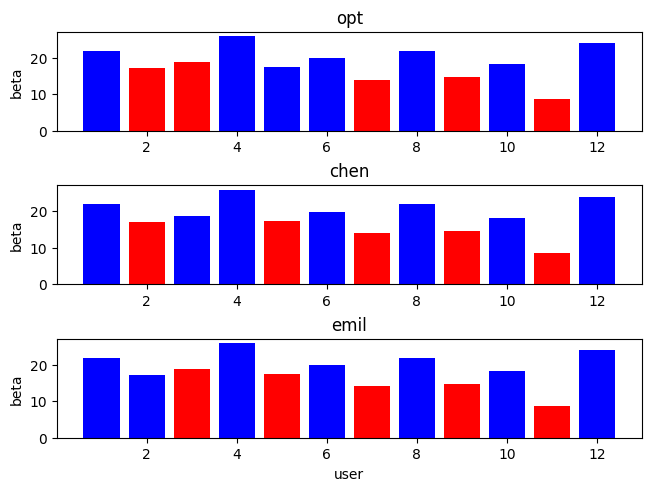

In [3]:
layout = 5
ap = 2
algorithm = 0

file = f"{setting}_layout_data_{layout}.mat"
layout_data_dict = loadmat(layout_dir_path + file)
path_loss_shadowing = layout_data_dict['path_loss_shadowing']
clusters_emil, _ = emil_heuristic_dcc_pilot_assignment(path_loss_shadowing, num_pilots)
clusters_chen = massive_access_clustering(path_loss_shadowing, num_pilots)
ap_cluster_opt = clusters[num_layouts * algorithm + layout, :, ap]
ap_cluster_opt_indices = np.where(ap_cluster_opt==1)[0]
ap_cluster_emil = clusters_emil[:, ap]
ap_cluster_emil_indices = np.where(ap_cluster_emil==1)[0]
ap_cluster_chen = clusters_chen[:, ap]
ap_cluster_chen_indices = np.where(ap_cluster_chen==1)[0]
betas_ap = path_loss_shadowing[:, ap]

_, axs = plt.subplots(ncols=1, nrows=3, layout="constrained")

temp_betas_ap = np.copy(betas_ap)
temp_betas_ap[ap_cluster_opt_indices]=0
axs[0].bar(range(1, num_users+1), -temp_betas_ap,color='b')
axs[0].bar(ap_cluster_opt_indices + 1, -betas_ap[ap_cluster_opt_indices],color='r')
axs[0].set_ylabel('beta')
axs[0].set_title('opt')

temp_betas_ap = np.copy(betas_ap)
temp_betas_ap[ap_cluster_chen_indices]=0
axs[1].bar(range(1, num_users+1), -temp_betas_ap,color='b')
axs[1].bar(ap_cluster_chen_indices + 1, -betas_ap[ap_cluster_chen_indices],color='r')
axs[1].set_ylabel('beta')
axs[1].set_title('chen')

temp_betas_ap = np.copy(betas_ap)
temp_betas_ap[ap_cluster_emil_indices]=0
axs[2].bar(range(1, num_users+1), -temp_betas_ap,color='b')
axs[2].bar(ap_cluster_emil_indices + 1, -betas_ap[ap_cluster_emil_indices],color='r')
axs[2].set_ylabel('beta')
axs[2].set_xlabel('user')
axs[2].set_title('emil')

## Comparison of combining/precoding algorithms - Optimal - Same AP

Text(0.5, 1.0, 'MR')

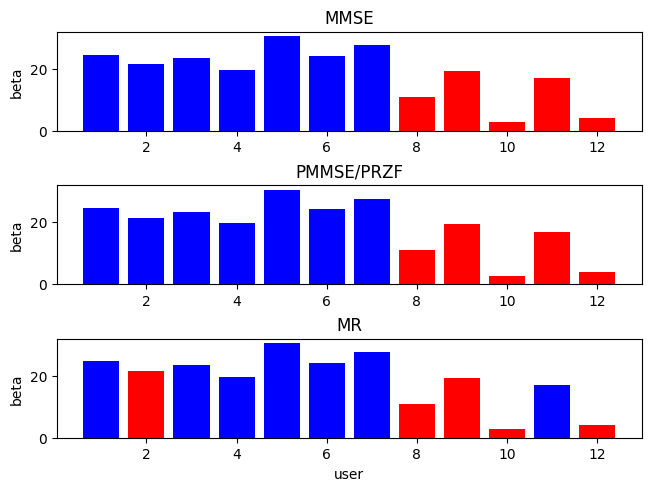

In [4]:
layout = 7
ap = 5
file = f"{setting}_layout_data_{layout}.mat"
layout_data_dict = loadmat(layout_dir_path + file)
path_loss_shadowing = layout_data_dict['path_loss_shadowing']
clusters_emil, _ = emil_heuristic_dcc_pilot_assignment(path_loss_shadowing, num_pilots)
clusters_chen = massive_access_clustering(path_loss_shadowing, num_pilots)

betas_ap = path_loss_shadowing[:, ap]
_, axs = plt.subplots(ncols=1, nrows=3, layout="constrained")

algorithm = 0
ap_cluster_opt = clusters[num_layouts * algorithm + layout, :, ap]
ap_cluster_opt_indices = np.where(ap_cluster_opt==1)[0]
temp_betas_ap = np.copy(betas_ap)
temp_betas_ap[ap_cluster_opt_indices]=0
axs[0].bar(range(1, num_users+1), -temp_betas_ap,color='b')
axs[0].bar(ap_cluster_opt_indices + 1, -betas_ap[ap_cluster_opt_indices],color='r')
axs[0].set_ylabel('beta')
axs[0].set_title('MMSE')

algorithm = 1
ap_cluster_opt = clusters[num_layouts * algorithm + layout, :, ap]
ap_cluster_opt_indices = np.where(ap_cluster_opt==1)[0]
temp_betas_ap = np.copy(betas_ap)
temp_betas_ap[ap_cluster_opt_indices]=0
axs[1].bar(range(1, num_users+1), -temp_betas_ap,color='b')
axs[1].bar(ap_cluster_opt_indices + 1, -betas_ap[ap_cluster_opt_indices],color='r')
axs[1].set_ylabel('beta')
axs[1].set_title('PMMSE/PRZF')

algorithm = 2
ap_cluster_opt = clusters[num_layouts * algorithm + layout, :, ap]
ap_cluster_opt_indices = np.where(ap_cluster_opt==1)[0]
temp_betas_ap = np.copy(betas_ap)
temp_betas_ap[ap_cluster_opt_indices]=0
axs[2].bar(range(1, num_users+1), -temp_betas_ap,color='b')
axs[2].bar(ap_cluster_opt_indices + 1, -betas_ap[ap_cluster_opt_indices],color='r')
axs[2].set_ylabel('beta')
axs[2].set_xlabel('user')
axs[2].set_title('MR')

## Comparison of combining/precoding algorithms - Optimal - Same User

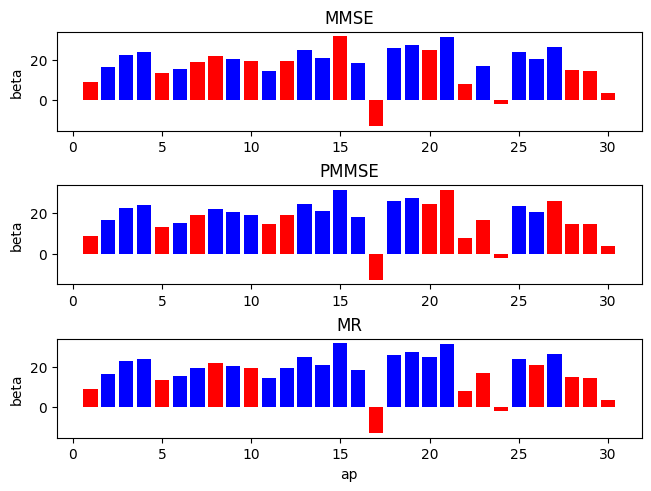

In [5]:
user = 0
layout = 6

file = f"{setting}_layout_data_{layout}.mat"
layout_data_dict = loadmat(layout_dir_path + file)
path_loss_shadowing = layout_data_dict['path_loss_shadowing']
_, axs = plt.subplots(ncols=1, nrows=3,
                        layout="constrained")

algorithm = 0
user_cluster_opt = clusters[num_layouts * algorithm + layout, user]
user_cluster_opt_indices = np.where(user_cluster_opt==1)[0]
betas_user = path_loss_shadowing[user]
temp_betas_user = np.copy(betas_user)
temp_betas_user[user_cluster_opt_indices]=0
axs[0].bar(range(1, num_aps+1), -temp_betas_user,color='b')
axs[0].bar(user_cluster_opt_indices + 1, -betas_user[user_cluster_opt_indices],color='r')
axs[0].set_ylabel('beta')
axs[0].set_title('MMSE')
# ax.set_xlabel('ap')

algorithm = 1
user_cluster_opt = clusters[num_layouts * algorithm + layout, user]
user_cluster_opt_indices = np.where(user_cluster_opt==1)[0]
betas_user = path_loss_shadowing[user]
temp_betas_user = np.copy(betas_user)
temp_betas_user[user_cluster_opt_indices]=0
axs[1].bar(range(1, num_aps+1), -temp_betas_user,color='b')
axs[1].bar(user_cluster_opt_indices + 1, -betas_user[user_cluster_opt_indices],color='r')
axs[1].set_title('PMMSE')
axs[1].set_ylabel('beta')
# ax.set_xlabel('ap')

algorithm = 2
user_cluster_opt = clusters[num_layouts * algorithm + layout, user]
user_cluster_opt_indices = np.where(user_cluster_opt==1)[0]
betas_user = path_loss_shadowing[user]
temp_betas_user = np.copy(betas_user)
temp_betas_user[user_cluster_opt_indices]=0
axs[2].bar(range(1, num_aps+1), -temp_betas_user,color='b')
axs[2].bar(user_cluster_opt_indices + 1, -betas_user[user_cluster_opt_indices],color='r')
axs[2].set_xlabel('ap')
axs[2].set_ylabel('beta')
axs[2].set_title('MR')

plt.show()

In [6]:
sum_beta = np.zeros((num_layouts, num_users, 3))
cluster_size = np.zeros((num_layouts, num_users, 3))

for user in range(num_users):
    for algorithm in range(3):
        for layout in range(num_layouts):
            user_cluster_opt = clusters[num_layouts * algorithm + layout, user]
            cluster_size[layout, user, algorithm] = np.sum(user_cluster_opt)
            sum_beta[layout, user, algorithm] = 10*np.log10(np.sum(user_cluster_opt * 10**(path_loss_shadowing[user]/10)))

In [7]:
print(np.mean(np.mean(sum_beta,axis=0),axis=0))
print(np.mean(np.mean(cluster_size,axis=0),axis=0))

[2.94028263 2.57102239 2.6200903 ]
[12.5   12.475 11.7  ]


## User vs Other User - Optimal

Text(0.5, 0, 'ap')

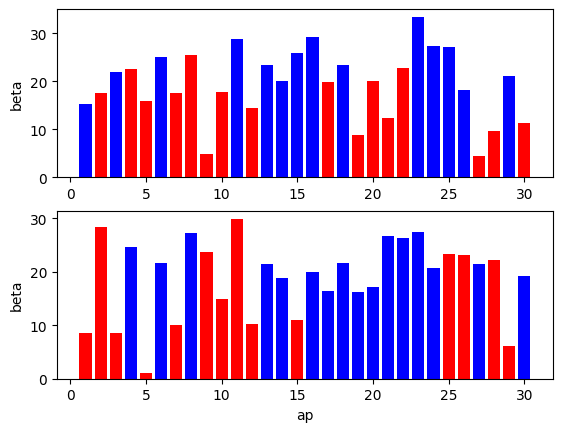

In [8]:
layout = 5
algorithm = 0
file = f"{setting}_layout_data_{layout}.mat"
layout_data_dict = loadmat(layout_dir_path + file)
path_loss_shadowing = layout_data_dict['path_loss_shadowing']

user = 0
user_cluster_opt = clusters[num_layouts * algorithm + layout, user]
user_cluster_opt_indices = np.where(user_cluster_opt==1)[0]
betas_user = path_loss_shadowing[user]

fig = plt.figure()
ax = plt.subplot(211)
temp_betas_user = np.copy(betas_user)
temp_betas_user[user_cluster_opt_indices]=0
ax.bar(range(1, num_aps+1), -temp_betas_user,color='b')
ax.bar(user_cluster_opt_indices + 1, -betas_user[user_cluster_opt_indices],color='r')
ax.set_ylabel('beta')

user = 10
user_cluster_opt = clusters[num_layouts * algorithm + layout, user]
user_cluster_opt_indices = np.where(user_cluster_opt==1)[0]
betas_user = path_loss_shadowing[user]

ax = plt.subplot(212)
temp_betas_user = np.copy(betas_user)
temp_betas_user[user_cluster_opt_indices]=0
ax.bar(range(1, num_aps+1), -temp_betas_user,color='b')
ax.bar(user_cluster_opt_indices + 1, -betas_user[user_cluster_opt_indices],color='r')
ax.set_ylabel('beta')
ax.set_xlabel('ap')